In [1]:
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
import scipy
import csv
import pandas as pd
import math
import statsmodels
import itertools
import seaborn as sns
import random
import os
from textwrap import wrap
import pickle
import gzip
import random
from time import sleep
import sys

In [50]:
def save(directory, obj):
    with open(directory+'.pickle', 'wb') as f:
        pickle.dump(obj, f)
        
def load(directory):
    with open(directory+'.pickle', 'rb') as f:
        loaded_obj = pickle.load(f)
    return loaded_obj

Data Source

http://hgdownload.cse.ucsc.edu/goldenPath/hg19/chromosomes/

ftp://ftp.ncbi.nlm.nih.gov/hapmap/recombination/2006-10_rel21_phaseI+II/  #hg17

https://www.ncbi.nlm.nih.gov/geo/roadmap/epigenomics/?fbclid=IwAR3EXmJXis2b-RhBBmf3svfcwkxh8IGHCwibQzQekCSAQFoqoP4LKLqcR2I

ftp://ftp.ncbi.nih.gov/snp/organisms/human_9606_b151_GRCh37p13/BED/

https://genome.ucsc.edu/cgi-bin/hgLiftOver

In [2]:
ans = []
for index, row in hotspots.iterrows():
    ans.append('{}:{}-{}'.format(row['Chromosome'], row['Start'], row['End']))
f= open("data/map/hotspot_hg17.txt","w+")
for i in ans:
    f.write(i+"\n")
f.close()

NameError: name 'hotspots' is not defined

In [ ]:
content = []
with open("data/map/hglft_genome_25fc0_a0ecf0.bed")as f: # hg17 to 19
# with open("data/map/hglft_genome_27989_a13840.bed")as f: # hg18 to 19
    for line in f:
        chrom, start, end = line.strip().replace('-', ':').split(":")
        start, end = int(start), int(end)
        width = int((end - start )/1000)
        center = int((end + start )/2)
        content.append([chrom, center, start, end, width])

header = ['Chromosome', 'Centre', 'Start', 'End', 'Width(kb) ']
hotspots = pd.DataFrame(content,columns=header)

In [3]:
E032_DNase = pd.read_csv('data/E032/E032-DNase.tagAlign.gz', sep='\t', header=None)
E032_H3K4me3 = pd.read_csv('data/E032/E032-H3K4me3.tagAlign.gz', sep='\t', header=None)
E032_H3K36me3 = pd.read_csv('data/E032/E032-H3K36me3.tagAlign.gz', sep='\t', header=None)

In [3]:
E032_H3K4me3.head()

,0,1,2,3,4,5
0,chr1,10149,10185,N,1000,+
1,chr1,10152,10188,N,1000,+
2,chr1,10154,10190,N,1000,-
3,chr1,10159,10195,N,1000,-
4,chr1,10229,10265,N,1000,-


In [3]:
# hotspots = pd.read_csv('data/source/hotspots.txt.gz', sep='\t')
dnase1 = pd.read_csv('data/source/GSM468792_UW.IMR90.ChromatinAccessibility.DS11759.bed.gz', sep='\t', header=None)
dnase2 = pd.read_csv('data/source/GSM468801_UW.IMR90.ChromatinAccessibility.DS11764.bed.gz', sep='\t', header=None)

In [4]:
UCSD_H3K4me1 = pd.read_csv('data/source/GSM409307_UCSD.H1.H3K4me1.LL228.bed.gz', sep='\t', header=None)
UCSD_H3K4me3 = pd.read_csv('data/source/GSM409308_UCSD.H1.H3K4me3.LL227.bed.gz', sep='\t', header=None)
UCSD_H3K36me3 = pd.read_csv('data/source/GSM409312_UCSD.H1.H3K36me3.LL220.bed.gz', sep='\t', header=None)

In [5]:
UCSF_H3K9ac = pd.read_csv('data/source/GSM410807_UCSF-UBC.H1.H3K9ac.H1EScd1-acK9-A.bed.gz', sep='\t', header=None)
UCSF_H3K4me3 = pd.read_csv('data/source/GSM410808_UCSF-UBC.H1.H3K4me3.H1EScd1-me3K4-A.bed.gz', sep='\t', header=None)
UCSF_H3K9me3 = pd.read_csv('data/source/GSM428291_UCSF-UBC.H1.H3K9me3.H1EScd1-me3K9-A.bed.gz', sep='\t', header=None)
UCSF_H3K27me3 = pd.read_csv('data/source/GSM428295_UCSF-UBC.H1.H3K27me3.H1EScd1-me3K27-A.bed.gz', sep='\t', header=None)
UCSF_H3K36me3 = pd.read_csv('data/source/GSM428296_UCSF-UBC.H1.H3K36me3.H1EScd1-me3K36-A.bed.gz', sep='\t', header=None)

In [4]:
# ACGT
# chromatin_marks = [UCSD_H3K4me1, UCSD_H3K4me3, UCSD_H3K36me3, 
#                    UCSF_H3K9ac, UCSF_H3K4me3, UCSF_H3K9me3, 
#                    UCSF_H3K27me3, UCSF_H3K36me3]
# chromatin_marks = [UCSD_H3K4me1, UCSD_H3K4me3, UCSD_H3K36me3]
# dnase = [dnase1, dnase2]
chromatin_marks = [E032_H3K4me3, E032_H3K36me3]
dnase = [E032_DNase]
# SNP

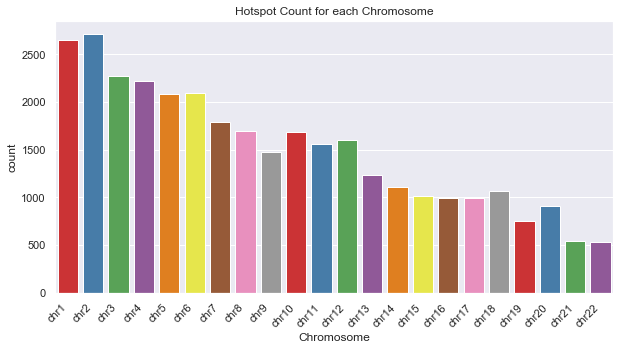

In [7]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=hotspots,
    x='Chromosome',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Hotspot Count for each Chromosome')
plt.show()

In [10]:
hotspots[hotspots['Chromosome']=='chr2'].head()

,Chromosome,Centre,Start,End,Width(kb)
2648,chr2,208501,206001,211001,5
2649,chr2,218001,216001,220001,4
2650,chr2,312001,305001,319001,14
2651,chr2,340001,336001,344001,8
2652,chr2,382501,380001,385001,5


In [5]:
def make_coldspots(hotspots, chrom):
    hotspots = hotspots[hotspots['Chromosome']==chrom]
    coldspots = []
    first = True
    previous = None
    for index, row in hotspots.iterrows():
        if not first:
            chromosome = row['Chromosome']
            start = previous['End']
            end = row['Start']
            centre = int((start + end) / 2) + 1
            width = int((end - start) / 1000)
            if start < end:
                coldspots.append([chromosome, centre, start, end, width])
        previous = row
        first = False
        
    coldspots =  pd.DataFrame(coldspots, columns = hotspots.columns)
    return coldspots

In [12]:
coldspots = make_coldspots(hotspots, 'chr2')
coldspots.head()

,Chromosome,Centre,Start,End,Width(kb)
0,chr2,213502,211001,216001,5
1,chr2,262502,220001,305001,85
2,chr2,327502,319001,336001,17
3,chr2,362002,344001,380001,36
4,chr2,389002,385001,393001,8


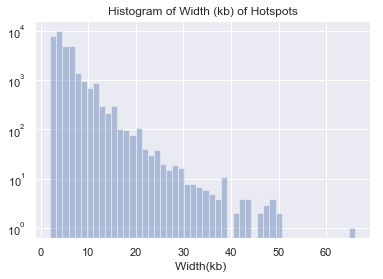

In [13]:
hotspots.head()
sns.distplot(hotspots['Width(kb) '], kde=False, bins = 50)
plt.title('Histogram of Width (kb) of Hotspots')
plt.yscale('log')

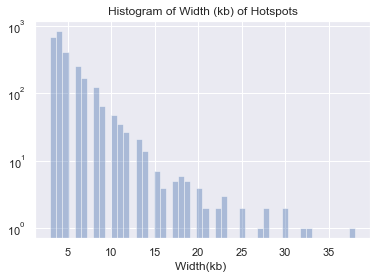

In [14]:
hotspots.head()
sns.distplot(hotspots[hotspots['Chromosome']=='chr2']['Width(kb) '], kde=False, bins = 50)
plt.title('Histogram of Width (kb) of Hotspots')
plt.yscale('log')

In [15]:
UCSD_H3K4me1.head()

,0,1,2,3,4,5
0,chr1,10240,10439,UCSD.H1.H3K4me1.LL228.SRR018456.5495714,1,+
1,chr1,56253,56452,UCSD.H1.H3K4me1.LL228.SRR018456.2688963,1,+
2,chr1,57376,57575,UCSD.H1.H3K4me1.LL228.SRR018456.2184528,1,+
3,chr1,139455,139654,UCSD.H1.H3K4me1.LL228.SRR018456.4631871,1,+
4,chr1,256610,256809,UCSD.H1.H3K4me1.LL228.SRR018456.6266608,1,+


In [16]:
UCSF_H3K9ac.head()

,0,1,2,3,4,5
0,chr1,20109,20308,UCSF-UBC.H1.H3K9ac.H1EScd1-acK9-A.SRR018231.46...,1,+
1,chr1,26786,26985,UCSF-UBC.H1.H3K9ac.H1EScd1-acK9-A.SRR018231.72...,1,+
2,chr1,48164,48363,UCSF-UBC.H1.H3K9ac.H1EScd1-acK9-A.SRR018231.26...,1,+
3,chr1,51941,52140,UCSF-UBC.H1.H3K9ac.H1EScd1-acK9-A.SRR018231.65...,1,+
4,chr1,53809,54008,UCSF-UBC.H1.H3K9ac.H1EScd1-acK9-A.SRR018231.30...,1,+


In [17]:
dnase1.head()

,0,1,2,3,4
0,chr1,9969,9997,SOLEXA-1GA-1_1:2:54:1275:2036,-
1,chr1,9970,10004,SOLEXA-1GA-1_1:4:44:1119:2040,-
2,chr1,9970,9996,SOLEXA-1GA-1_1:2:43:1251:2036,-
3,chr1,9970,9997,SOLEXA-1GA-1_1:4:40:1305:2038,-
4,chr1,9971,9996,SOLEXA-1GA-1_1:2:34:1168:2037,-


In [44]:
def drawProgressBar(percent, barLen = 20):
    # percent float from 0 to 1. 
    sys.stdout.write("\r")
    sys.stdout.write("[{:<{}}] {:.0f}%".format("=" * int(barLen * percent), barLen, percent * 100))
    sys.stdout.flush()

In [45]:
def flatten(data, start, end):
    df = data[(start <= data[1]) & (data[2] <= end)]
    out = [0 for i in range(start, end)]
    for index, row in df.iterrows():
        for i in range(row[1]-start, row[2]-start):
            if i < len(out):
                out[i] = 1
    return out

def get_sequence(chromosome):
    rawseq = open('data/chromosome/'+ chromosome + '.fa','r')
    seq = rawseq.read()
    seq = seq.replace("\n", "")
    seq = seq[len(chromosome) + 1:]
    return seq

def get_nucleotides(seq, start, end):
    convert = {'g':'G', 'a':'A', 't':'T', 'c': 'C', 'n':'N', '>':'N'}
    nucleotides = [convert[seq[i]] if seq[i] in convert else seq[i] for i in range(start, end)]
    return nucleotides

def divide_chunks(l, n): 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 

def one_hot_encode(seq):
    mapping = dict(zip("ACGT", range(4)))    
    seq2 = [mapping[i] for i in seq]
    return np.eye(4)[seq2]

In [46]:
def get_data(chromosome, hotspots, chromatin_marks, dnase):
    data = []
    hotspots = hotspots[hotspots['Chromosome'] == chromosome]
    chromatin_marks = [mark[(mark[0]==chromosome) & (mark[5]=='+')] for mark in chromatin_marks]
    dnase = [dna[(dna[0]==chromosome) & (dna[5]=='+')] for dna in dnase]
    seq = get_sequence(chromosome)
    snps = pd.read_csv('data/snp/bed_{}_{}.bed.gz'.format(chromosome[:3], chromosome[3:]), skiprows=1, sep='\t', header=None)
    snps = snps[snps[5]=='+']
    
    for index, row in hotspots.iterrows():
        
        # Grab the hotspot sequence and the corresponding states
        start, end, length = row['Start'], row['End'], row['Width(kb) '] 
        
        # Randomly choose one
        if length != 1:
            start = random.randint(start, end-1000)
            end = start + 1000
        
        # divide_chunks(1d array, 1000) to split the data into intervals of 1000
        # for i, j, k, l, m in zip(nucleot|ide, h3k1, h3k4, h3k36, dna):
        if end < len(seq):
            nucleotide = get_nucleotides(seq, start, end)
            marks = [flatten(mark, start, end) for mark in chromatin_marks]
            dna = [flatten(dna, start, end) for dna in dnase]
            snp = [flatten(snps, start, end)]

            # We do not want broken sequences
            if 'N' not in nucleotide:
                data.append(np.hstack((one_hot_encode(nucleotide), np.array(marks+snp+dna).T)))

            percent = len(data) / len(hotspots)
            drawProgressBar(percent, barLen = 20)
            
    return data

In [15]:
def create_data(chromosome, hotspots, chromatin_marks, dnase):
    coldspots = make_coldspots(hotspots, chromosome)
    
    hotspot_data = get_data(chromosome, hotspots, chromatin_marks, dnase)
    with open("data/spots/"+chromosome+"_hotspot_data.txt", "wb") as fp: 
        pickle.dump(hotspot_data, fp)
        
    coldspot_data = get_data(chromosome, coldspots, chromatin_marks, dnase)
    with open("data/spots/"+chromosome+"_coldspot_data.txt", "wb") as fp: 
        pickle.dump(coldspot_data, fp)

In [9]:
def create_data(chromosome, chromatin_marks, dnase):
    hotspots, coldspots = make_spot(chromosome)
    
    hotspot_data = get_data(chromosome, hotspots, chromatin_marks, dnase)
    with open("data/spots/"+chromosome+"_hotspot_data.txt", "wb") as fp: 
        pickle.dump(hotspot_data, fp)
        
    coldspot_data = get_data(chromosome, coldspots, chromatin_marks, dnase)
    with open("data/spots/"+chromosome+"_coldspot_data.txt", "wb") as fp: 
        pickle.dump(coldspot_data, fp)

In [14]:
for i in range(11, 12):
    print(i)
    create_data('chr'+str(i), chromatin_marks, dnase)

11
[====================] 100%

In [86]:
rate = pd.read_csv('data/rates/genetic_map_GRCh37_chr1.txt', sep='\t')

In [87]:
rate.head()

,Chromosome,Position(bp),Rate(cM/Mb),Map(cM)
0,chr1,55550,2.981822,0.000000
1,chr1,82571,2.082414,0.080572
2,chr1,88169,2.081358,0.092229
3,chr1,254996,3.354927,0.439456
4,chr1,564598,2.887498,1.478148


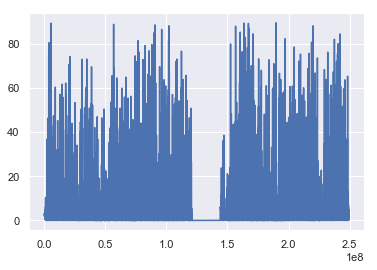

In [158]:
plt.plot(rate['Position(bp)'], rate['Rate(cM/Mb)'])

In [8]:
def make_spot(chromosome, threshold_hot=20, threshold_cold=0.0015):
    rates = pd.read_csv('data/rates/genetic_map_GRCh37_{}.txt'.format(chromosome), sep='\t')
    rates['hotspot'] = [0 if i < threshold_hot else 1 for i in rates['Rate(cM/Mb)']]

    hotspots = []
    for index, row in rates[rates['Rate(cM/Mb)']>=threshold_hot].iterrows():
        center = row['Position(bp)']
        start = center - 500
        end = center + 500
        width = 1
        hotspots.append([chromosome, center, start, end, width])
    
    coldspots = []
    for index, row in rates[rates['Rate(cM/Mb)']<=threshold_cold].iterrows():
        center = row['Position(bp)']
        start = center - 500
        end = center + 500
        width = 1
        coldspots.append([chromosome, center, start, end, width])
        

    header = ['Chromosome', 'Centre', 'Start', 'End', 'Width(kb) ']
    hotspots = pd.DataFrame(hotspots,columns=header)
    coldspots = pd.DataFrame(coldspots,columns=header)
    return hotspots, coldspots

In [9]:
def make_midspots(chromosome):
    hot, cold = make_spot(chromosome)
    seq = get_sequence(chromosome)
    
    midspots = []
    for i in range(0, len(seq), 1000):
        a = len(hot[(hot['Start'] <= i) & (i <= hot['End'])]) == 0
        b = len(cold[(cold['Start'] <= i) & (i <= cold['End'])]) == 0
        if a and b:
            start = i
            end = i + 1000
            center = (start + end) / 2
            width = 1
            midspots.append([chromosome, center, start, end, width])
        header = ['Chromosome', 'Centre', 'Start', 'End', 'Width(kb) ']
    midspots = pd.DataFrame(midspots,columns=header) 
    return midspots

In [10]:
chromosome = 'chr11'
midspots = make_midspots(chromosome)

In [11]:
midspot_data = get_data(chromosome, midspots, chromatin_marks, dnase)
with open("data/spots/"+chromosome+"_midspot_data.txt", "wb") as fp: 
    pickle.dump(midspot_data, fp)

[=================== ] 97%

In [184]:
rate = pd.read_csv('data/rates/genetic_map_GRCh37_chr1.txt', sep='\t')
hotspots = rate[rate['Rate(cM/Mb)']>=20]

<BarContainer object of 4069 artists>

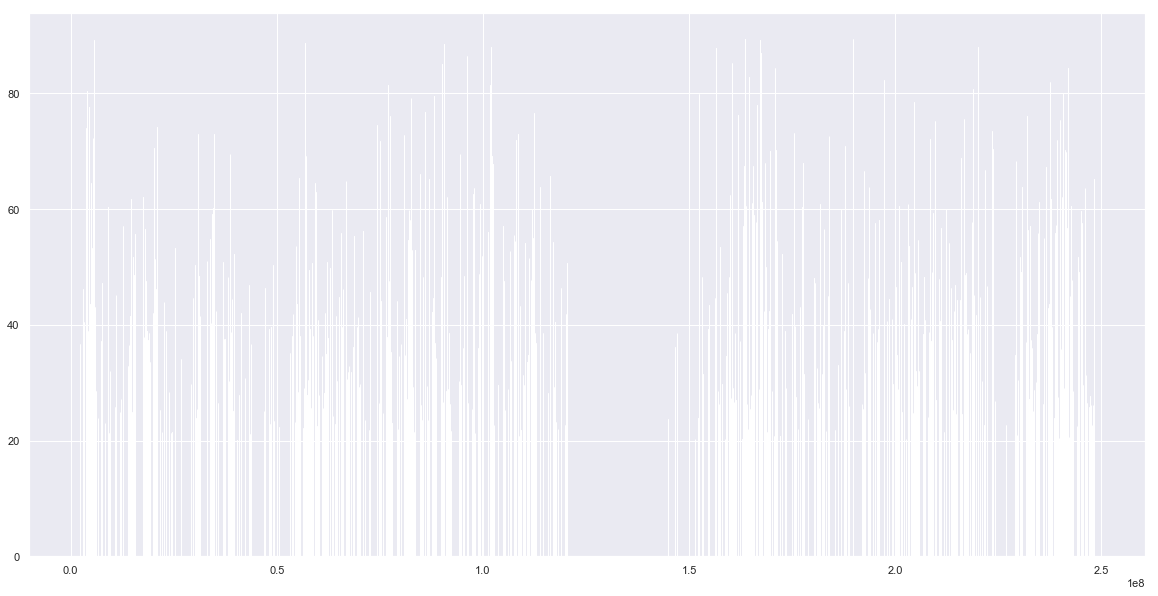

In [185]:
plt.figure(figsize=(20,10))
plt.bar(hotspots['Position(bp)'], hotspots['Rate(cM/Mb)'], color='red')

<BarContainer object of 21644 artists>

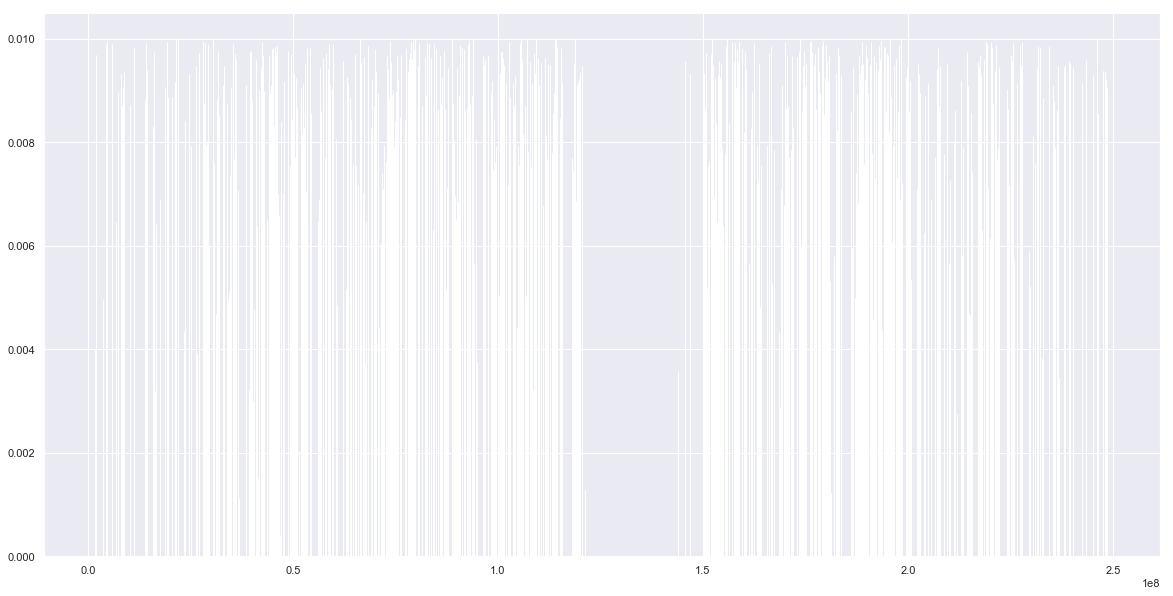

In [188]:
plt.figure(figsize=(20,10))
coldspots = rate[rate['Rate(cM/Mb)']<=.01]
plt.bar(coldspots['Position(bp)'], coldspots['Rate(cM/Mb)'], color='b')

In [12]:
def get_location(chromosome, hotspots):
    seq = get_sequence(chromosome)
    data = []
    for index, row in hotspots.iterrows():
        start, end, length = row['Start'], row['End'], row['Width(kb) '] 
        # Randomly choose one
        if length != 1:
            start = random.randint(start, end-1000)
            end = start + 1000
        
        if end < len(seq):
            nucleotide = get_nucleotides(seq, start, end)
            # We do not want broken sequences
            if 'N' not in nucleotide:
                data.append(start)

            percent = len(data) / len(hotspots)
            drawProgressBar(percent, barLen = 20)
            
    return data

In [13]:
chromosome = 'chr11'
midspots = make_midspots(chromosome)
hotspots, coldspots = make_spot(chromosome)
hot_loc = get_location(chromosome, hotspots)
cold_loc = get_location(chromosome, coldspots)
mid_loc = get_location(chromosome, midspots)
with open("data/loc/{}_loc.txt".format(chromosome), "wb") as fp: 
    pickle.dump([hot_loc, cold_loc, mid_loc], fp)

[=================== ] 97%%[============        ] 61%[=============       ] 68%[=============       ] 69%[===============     ] 76%[===============     ] 77%[=================   ] 89%[==================  ] 94%[==================  ] 95%[=================== ] 95%

In [ ]:
chromosome='chr17'
with open("data/spots/"+chromosome+"_midspot_data.txt", "rb") as fp:
    midspot_data = pickle.load(fp)

In [18]:
print(len(midspot_data))
print(len(mid_loc))

75834
75834


In [63]:
cent_start = 24 * 10**6
cent_end = 0
x = hot_loc + cold_loc + mid_loc[::100]
y = [1 for i in hot_loc] + [0 for i in cold_loc] + [0 if (cent_start < i and i < cent_end) else .5 for i in mid_loc][::100]

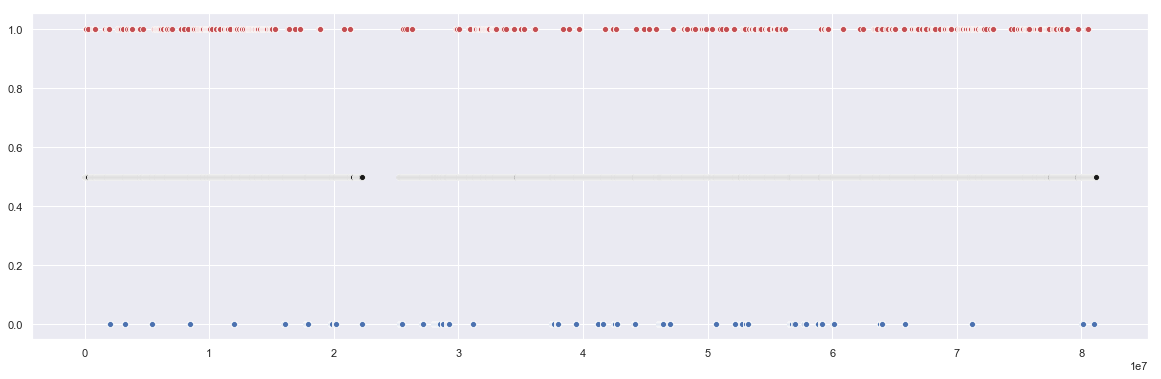

In [75]:
plt.figure(figsize=(20,6))
sns.scatterplot(mid_loc[::20], [0 if (cent_start < i and i < cent_end) else .5 for i in mid_loc][::20], color='k')
sns.scatterplot(cold_loc, [0 for i in cold_loc], color='b')
sns.scatterplot(hot_loc, [1 for i in hot_loc], color='r')

In [3]:
with open("data/slidepredicts/chr11_slidepredicts.txt", "rb") as fp:
    predicted_mid = pickle.load(fp)
with open("data/slidepredicts/chr11_slidepredictsHot.txt", "rb") as fp:
    predicted_hot = pickle.load(fp)
with open("data/slidepredicts/chr11_slidepredictsCold.txt", "rb") as fp:
    predicted_cold = pickle.load(fp)
with open("data/loc/chr11_loc.txt", "rb") as fp:
    locs = pickle.load(fp)

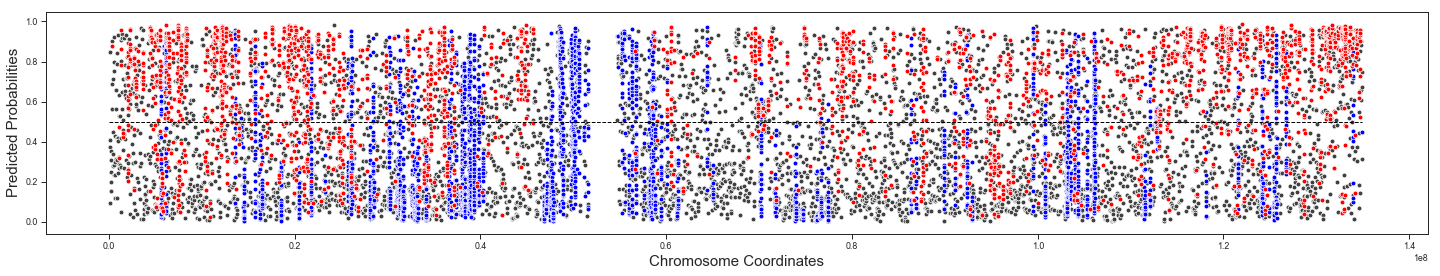

In [4]:
sns.set_style("ticks")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15}) 

plt.figure(figsize=(20,4))
sns.scatterplot(locs[2][::25], predicted_mid.T[0][::25], color='.25')
sns.scatterplot(locs[1], predicted_cold.T[0], color='b')
sns.scatterplot(locs[0], predicted_hot.T[0], color='r')
plt.hlines(.5, 0, locs[2][-1], linestyle='--', linewidth=1)
plt.tight_layout()
plt.xlabel('Chromosome Coordinates')
plt.ylabel('Predicted Probabilities')
plt.savefig("img/slide.png", bbox_inches='tight')

In [5]:
predicted_mid.T[0][::1000]

array([0.3723973 , 0.288311  , 0.9138423 , 0.78101337, 0.070526  ,
       0.337746  , 0.8422811 , 0.3650406 , 0.5161737 , 0.75367284,
       0.33845437, 0.45706633, 0.38852435, 0.11227465, 0.51441014,
       0.09658492, 0.13518402, 0.64500046, 0.17266715, 0.73876154,
       0.70697486, 0.6091647 , 0.05785066, 0.20184028, 0.68397313,
       0.16299772, 0.16344571, 0.08325014, 0.15695632, 0.90952146,
       0.26428068, 0.5170657 , 0.2776736 , 0.17804614, 0.2389622 ,
       0.6130051 , 0.4313035 , 0.19897959, 0.09192055, 0.13909578,
       0.28299952, 0.6282455 , 0.28854164, 0.67999494, 0.8163711 ,
       0.16530374, 0.49372   , 0.92484987, 0.16009939, 0.4658927 ,
       0.9532682 , 0.07227752, 0.34031147, 0.7119999 , 0.12689972,
       0.18908471, 0.76282597, 0.6837963 , 0.16643137, 0.2921692 ,
       0.93257093, 0.0385772 , 0.89298713, 0.6351502 , 0.56647587,
       0.45137122, 0.05068883, 0.05135778, 0.03160807, 0.24870214,
       0.8208631 , 0.92678535, 0.53813285, 0.5113142 , 0.44671

In [5]:
HOT = []
HOT_LOC = []

for i in range(len(predicted_hot)):
    if predicted_hot[i] >= .95:
        HOT.append(predicted_hot[i])
        HOT_LOC.append(locs[0][i])

COLD = []
COLD_LOC = []

for i in range(len(predicted_cold)):
    if predicted_cold[i] <= .05:
        COLD.append(predicted_cold[i])
        COLD_LOC.append(locs[1][i])
        
        
MID = []
MID_LOC = []

for i in range(len(predicted_mid)):
    if predicted_mid[i] >= .95 or predicted_mid[i] <= .05:
        MID.append(predicted_mid[i])
        MID_LOC.append(locs[2][i])
        
        

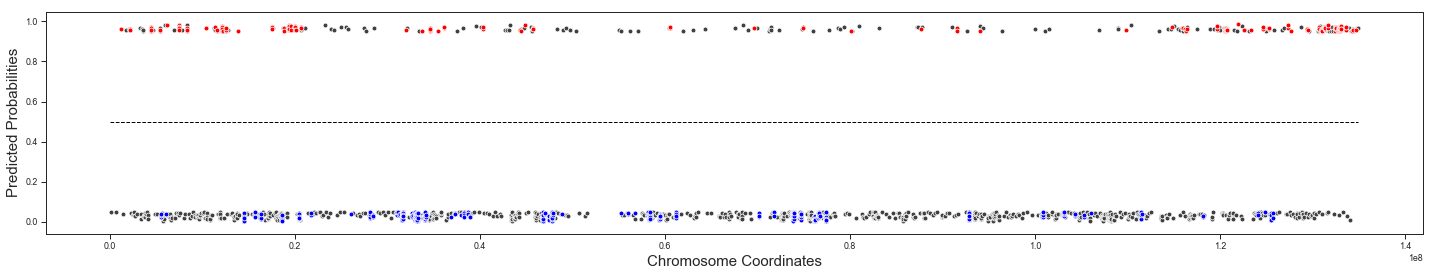

In [6]:
plt.figure(figsize=(20,4))
plt.hlines(.5, 0, locs[2][-1], linestyle='--', linewidth=1)
plt.tight_layout()
sns.scatterplot(MID_LOC[::10], MID[::10], color='.25')
sns.scatterplot(COLD_LOC, COLD, color='b')
sns.scatterplot(HOT_LOC, HOT, color='r')
plt.xlabel('Chromosome Coordinates')
plt.ylabel('Predicted Probabilities')
plt.savefig("img/slideRes.png", bbox_inches='tight')

In [7]:
MID = []
MID_LOC = []
match = {start for (start, end) in regions.keys()}
for i in range(len(predicted_mid)):
    if predicted_mid[i] <= .05 and locs[2][i] in match:
        MID.append(predicted_mid[i])
        MID_LOC.append(locs[2][i])

NameError: name 'regions' is not defined

In [45]:
len(MID)

62

In [59]:
choose = []
for i in range(len(predicted_mid)):
    if predicted_mid[i] >= .98:
        choose.append(locs[2][i])

In [64]:
choose

[5958000,
 8351000,
 11337000,
 17623000,
 23207000,
 23909000,
 24250000,
 25511000,
 49345000,
 55329000,
 63881000,
 79322000,
 81520000,
 81737000,
 94079000,
 110384000,
 115580000,
 116145000,
 118005000,
 120468000,
 125982000,
 127415000,
 131241000,
 133411000]

In [34]:
hg19_snps = []
with open("hglft_genome_a57b_c5fc10.bed") as f: 
    for line in f:
        chrom, start, end = line.strip().replace('-', ':').split(":")
        hg19_snps.append(int(start))

In [61]:
seq = get_sequence('chr11')
predicted_hot_sequences = []
for i in choose:
    start, end = i, i+1000
    predicted_hot_sequences.append(one_hot_encode(get_nucleotides(seq, start, end)))
save('hot_seq', predicted_hot_sequences)

In [41]:
regions = {}
dis = {}

for i in range(len(choose)):
    loc = choose[i]
    start, end = loc, loc + 1000

    for j in range(len(hg19_snps)):
        if start <= hg19_snps[j] and hg19_snps[j] < end:
            regions.setdefault((start, end), set())
            regions[(start, end)].add(hg19_snps[j])
            
            dis.setdefault((start, end), set())
            dis[(start, end)].add(disease[j])
            

In [42]:
len(regions)

62

In [177]:
62 / 1519

0.04081632653061224

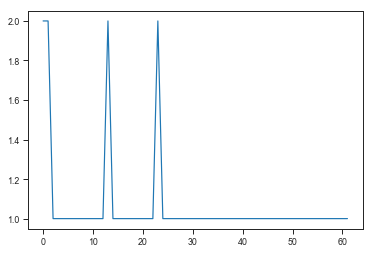

In [178]:
plt.plot([len(i) for i in regions.values()])

In [85]:
['chr11:{}-{}'.format(i, i+1000) for i in yes]

89

In [69]:
121/6574

0.018405841192576818

In [76]:
seq = get_sequence('chr11')

In [137]:
A, T, C, G = [], [], [], []
for start, end in regions: 
    a = ''.join(get_nucleotides(seq, start, end)).count('A')
    t = ''.join(get_nucleotides(seq, start, end)).count('T')
    c = ''.join(get_nucleotides(seq, start, end)).count('C')
    g = ''.join(get_nucleotides(seq, start, end)).count('G')
    A.append(a)
    T.append(t)
    C.append(c)
    G.append(g)

(0, 20)

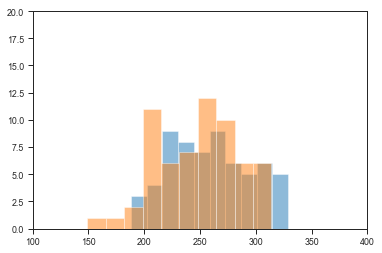

In [168]:
plt.hist(A, alpha=.5)
plt.hist(T, alpha=.5)
plt.xlim([100, 400])
plt.ylim([0, 20])

(0, 20)

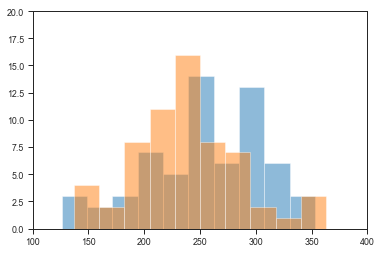

In [167]:
plt.hist(G, alpha=.5)
plt.hist(C, alpha=.5)
plt.xlim([100, 400])
plt.ylim([0, 20])

In [15]:
df = pd.read_csv('data/gwas/gwas_catalog_v1.0.2-associations_e96_r2019-11-21.tsv', sep='\t')
gwas11 = df[df['CHR_ID']=='11']
disease = gwas11['DISEASE/TRAIT'].values

In [14]:
for (start, end), sys in dis.items():
    print(start, end, sys)

2116000 2117000 set()


In [19]:
f= open("chr11_predicted_hotspot.bed","w+")
f.write("CHR\tSTART\tSTOP\n".format(i, i+1000))
count = 0
for i in choose:
    count += 1
    f.write("chr11\t{}\t{}\n".format(i, i+1000))
print(count)

1519


In [22]:
pd.read_csv('chr11_predicted_hotspot.bed', sep='\t')

,CHR,START,STOP
0,chr11,378000,379000
1,chr11,384000,385000
2,chr11,623000,624000
3,chr11,882000,883000
4,chr11,1275000,1276000
5,chr11,1395000,1396000
6,chr11,1421000,1422000
7,chr11,1449000,1450000
8,chr11,1572000,1573000
9,chr11,1628000,1629000


In [62]:
load('hot_seq')

[array([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]]), array([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.]]), array([[1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]]), array([[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]]), array([[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]]), array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
       

In [63]:
len(load('hot_seq'))

24